1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from random import randrange
from scipy import random, linalg
from scipy import linalg as la
import csv

In [2]:
n = 1000
x1 = np.random.normal(0,1, size = n)
x2 = np.random.normal(0,3, size = n) + x1
x3 = 2*x1 + x2

In [3]:
dataset = np.array((x1, x2, x3))
cov = np.cov(dataset)
l, V = la.eig(cov)
l = np.sort(l)[::-1] #sort in descending order
l = np.real_if_close(l)
print("Eigenvalues {} and eigenvectors \n{} \n with eigendecomposition.".format(l, V))
u, spectrum, Vt = la.svd(cov)
print("Eigenvalues {} and eigenvectors \n{} \n with SVD.".format(spectrum, u))

Eigenvalues [2.68586491e+01 2.03955268e+00 8.45465358e-16] and eigenvectors 
[[-0.11496445 -0.81649658  0.5657884 ]
 [-0.57798199 -0.40824829 -0.70659051]
 [-0.80791088  0.40824829  0.42498628]] 
 with eigendecomposition.
Eigenvalues [2.68586491e+01 2.03955268e+00 1.16494816e-15] and eigenvectors 
[[-0.11496445  0.5657884  -0.81649658]
 [-0.57798199 -0.70659051 -0.40824829]
 [-0.80791088  0.42498628  0.40824829]] 
 with SVD.


Two eigenvalues are not completely similar if calculated with eigendecomposition or SVD; this is likely due to a rounding error, what matters is that both are close to $0$.

In [4]:
Lambda = np.diag(l)
print("Percentage difference between cov.trace() and Lambda.trace(): {:.5}.".format(np.abs(cov.trace() - np.real_if_close(Lambda.trace()))/np.real_if_close(Lambda.trace())))
p = Lambda[0][0]/Lambda.trace()
p2 = (Lambda[0][0]+Lambda[1][1])/Lambda.trace()
print("{:.5}% of the total dataset's variability is explained by the principal components.".format(np.real_if_close(p)*100))
print("By reducing the dimensionality to the first two eigenvectors, {:.5}% of the total dataset's variability is explained.".format(np.real_if_close(p2)*100))

Percentage difference between cov.trace() and Lambda.trace(): 1.2294e-16.
92.942% of the total dataset's variability is explained by the principal components.
By reducing the dimensionality to the first two eigenvectors, 100.0% of the total dataset's variability is explained.


This result makes sense, since the dataset was constructed with $x_{2,3}$ depending from $x_1$, so it is reasonable to see the majority of the information being retained by just one variable.

In [5]:
datasetp = np.dot(V.T, dataset)

In [6]:
plt.rc('font', family='serif', size=8)
plt.rc('text', usetex=False)
plt.rc('mathtext', fontset='cm')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=20)

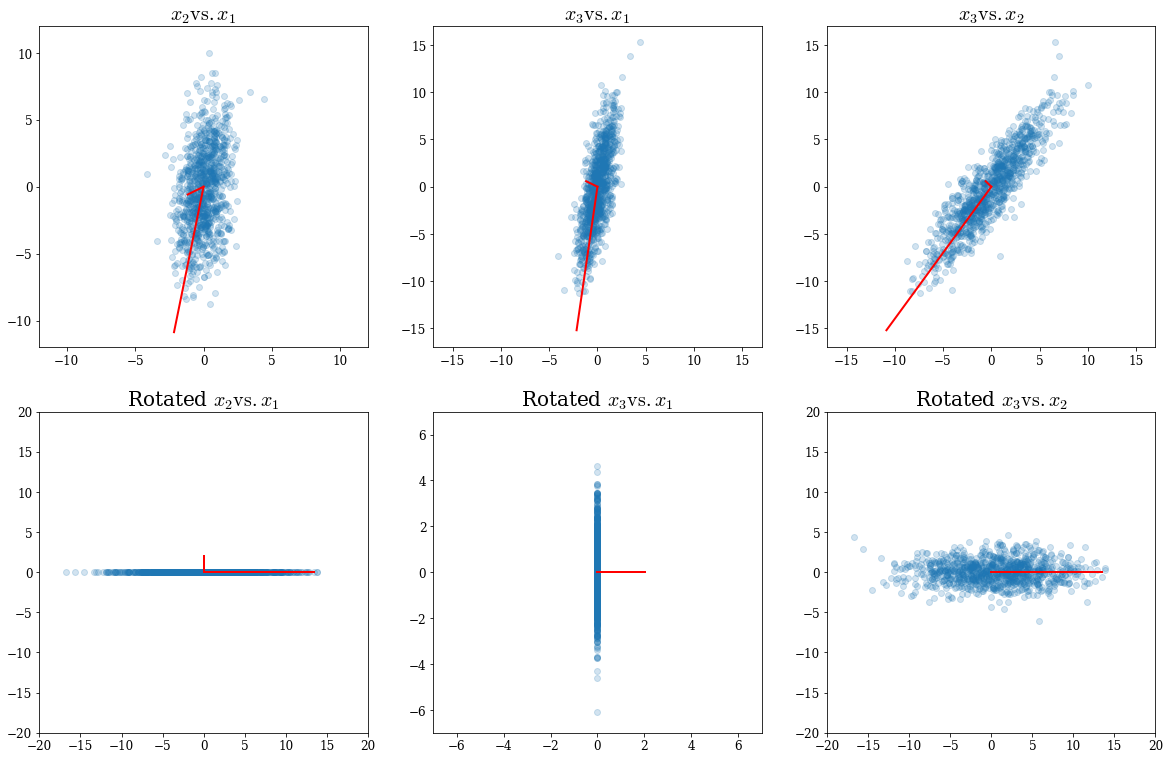

In [7]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20, 13))

scale_factor = 0.7

ax1.scatter(dataset[0,:], dataset[1,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax1.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
ax1.axis([-12,12,-12,12])
ax1.set_title(r'$x_2\mathrm{vs.}x_1$')

ax2.scatter(dataset[0,:], dataset[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax2.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)    
ax2.axis([-17,17,-17,17])
ax2.set_title(r'$x_3\mathrm{vs.}x_1$')

ax3.scatter(dataset[1,:], dataset[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax3.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)    
ax3.axis([-17,17,-17,17])
ax3.set_title(r'$x_3\mathrm{vs.}x_2$')

#rotated dataset

ax4.scatter(datasetp[0,:], datasetp[1,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*3)):
    ax4.plot([0, 0.5*li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax4.axis([-20,20,-20,20])
ax4.set_title(r'Rotated $x_2\mathrm{vs.}x_1$')

ax5.scatter(datasetp[1,:], datasetp[2,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*3)):
    ax5.plot([0, li*vi[1]], [0, li*vi[2]], 'r-', lw=2)
ax5.axis([-7,7,-7,7])
ax5.set_title(r'Rotated $x_3\mathrm{vs.}x_1$')

ax6.scatter(datasetp[0,:], datasetp[2,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*3)):
    ax6.plot([0, 0.5*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
ax6.axis([-20,20,-20,20])
ax6.set_title(r'Rotated $x_3\mathrm{vs.}x_2$')

plt.subplots_adjust(wspace = 0.2)
plt.show()

The rotated plots show graphically what has been observed: the information is being retained by just one variable since in the rotated basis the projection onto the $x_2\mathrm{vs.}x_1$ and $x_3\mathrm{vs.}x_1$ plane is flat. The last eigenvector is not visible in the last two plots due to the fact that it is in the order of magnitude of $\sim10^{-15}$. In the rotated basis the eigenvectors are orthogonal.

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [8]:
noise = np.vstack((dataset, (np.array([np.random.normal(0, 1/50, size = 1000) for i in range(10)]).reshape(10,1000))))

In [9]:
covn = np.cov(noise)
ln, Vn = la.eig(covn)
ln = np.sort(ln)[::-1]
ln = np.real_if_close(ln)

In [10]:
Lambdan = np.diag(ln)
print("Percentage difference between cov.trace() and Lambda.trace() with added noise: {:.5}.".format(np.abs(covn.trace() - np.real_if_close(Lambdan.trace()))/np.real_if_close(Lambdan.trace())))
pn = Lambdan[0][0]/Lambdan.trace()
p2n = (Lambdan[0][0]+Lambdan[1][1])/Lambdan.trace()
print("{:.5}% of the total dataset's variability is explained by the principal components.".format(np.real_if_close(pn)*100))
print("By reducing the dimensionality to the first two eigenvectors, {:.5}% of the total dataset's variability is explained.".format(np.real_if_close(p2n)*100))

Percentage difference between cov.trace() and Lambda.trace() with added noise: 2.4584e-16.
92.93% of the total dataset's variability is explained by the principal components.
By reducing the dimensionality to the first two eigenvectors, 99.986% of the total dataset's variability is explained.


Because $\mu_{noise} = 0$, $\sigma_{noise}\ll\sigma_{dataset}$ and the noise being statistically indipendent from the dataset, the added background doesn't significantly worsen the amount of information given by the fist two eigenvectors; the percentage $\sum^k_{i=1} \lambda_i/\sum^p_{i=1} \lambda_i$ with $k<p$ remains comparable to the ideal case without noise.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [11]:
data = pd.read_csv('magic04.data',nrows=1000)
data.columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','category']
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g
...,...,...,...,...,...,...,...,...,...,...,...
995,13.3396,10.5628,2.1917,0.7910,0.4019,-14.8910,-2.3901,11.9001,10.7959,182.910,g
996,49.8521,11.4525,2.3971,0.4529,0.2305,52.6071,39.3622,-8.6905,6.0457,183.495,g
997,29.2688,14.2779,2.5723,0.4016,0.2021,-21.2132,-23.9344,-8.2073,47.5590,102.779,g
998,21.9470,20.3281,2.4864,0.4078,0.2072,12.8338,10.4007,14.8348,40.4341,137.810,g


In [12]:
del data['category']
cov_magic = np.cov(data.T)
l_magic, V_magic = la.eig(cov_magic)
l_magic = np.sort(l_magic)[::-1]
l_magic = np.real_if_close(l_magic)

In [13]:
Lambda_magic = np.diag(l_magic)
print("Percentage difference between cov.trace() and Lambda.trace(): {:.5}.".format(np.abs(cov_magic.trace() - np.real_if_close(Lambda_magic.trace()))/np.real_if_close(Lambda_magic.trace())))
p = Lambda_magic[0][0]/Lambda_magic.trace()
print("{:.5}% of the total dataset's variability is explained by the principal components.".format(np.real_if_close(p)*100))

Percentage difference between cov.trace() and Lambda.trace(): 6.164e-16.
60.797% of the total dataset's variability is explained by the principal components.


In [14]:
threshold = .99 #setting a threshold for the dataset percentage
info = p #variable holding the updated precision value
i = 1 #index of the eigenvalues
while info < threshold:
    info += Lambda_magic[i][i]/Lambda_magic.trace()
    i += 1
print("To have {:.5}% of the total dataset's variability explained, the first {} eigenvalues are needed.".format(info*100,i))

To have 99.587% of the total dataset's variability explained, the first 6 eigenvalues are needed.
